In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd "drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project"
%ls

/content/drive/MyDrive/22_FALL_KRISS_BIWEEKLY/Semester Project/Final_Project
'60 40 Wt Port.ipynb'
 CPIAUCNS.csv
'CPI_S&P.ipynb'
 df1_monthly.csv
'DF Data.csv'
'DF Equal Weight.csv'
'DF Inflation Beta.csv'
'DF SixFour Weight.csv'
'DF VolWt.csv'
 EqWeight.ipynb
'Excel Files'/
 filtered_df1.csv
 InflationBeta.ipynb
 Inflationolsregression.ipynb
'Inflation OLS Regression.ipynb'
 Inflation_VolWt.ipynb
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.gdoc
 methodology-sp-multi-asset-dynamic-inflation-strategy-index.pdf
'Multi-Asset Portfolio Final.ipynb'
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.gdoc
 research-a-dynamic-multi-asset-approach-to-inflation-hedging.pdf
'S&P500 Features Data.csv'
'SP Composite 1500.csv'
'SP GSCI Copper.csv'
'SP GSCI Crude Oil.csv'
'SP GSCI.csv'
'SP GSCI Gold.csv'
'SP United States REIT.csv'
'SP U.S. Aggregate Bond Index.csv'
'SP U.S. TIPS Index.csv'
 US_inflation.csv


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline
plt.style.use('seaborn')

In [4]:
# read by default 1st sheet of an excel file
SP1500 = pd.read_csv('SP Composite 1500.csv')
SPCopper = pd.read_csv('SP GSCI Copper.csv')
SPOil = pd.read_csv('SP GSCI Crude Oil.csv')
SPGold = pd.read_csv('SP GSCI Gold.csv')
SPGSCI = pd.read_csv('SP GSCI.csv')
SPBonds = pd.read_csv('SP U.S. Aggregate Bond Index.csv')
SPTips = pd.read_csv('SP U.S. TIPS Index.csv')
SPReit = pd.read_csv('SP United States REIT.csv')
CPI = pd.read_csv('CPIAUCNS.csv')

In [5]:
CPI.head()

,Date,CPI
0,2012-10-01,231.317
1,2012-11-01,230.221
2,2012-12-01,229.601
3,2013-01-01,230.280
4,2013-02-01,232.166


In [6]:
data = [SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit]

In [7]:
for df in data:
    df.set_index('Date', inplace = True)
    df.drop(df.tail(1).index,inplace=True)
    df.index=pd.to_datetime(df.index)
    df.dropna(inplace = True)

In [8]:
CPI['Date'] = pd.to_datetime(CPI['Date'])
CPI['Date'] = CPI['Date'].apply(lambda x: x.strftime('%Y-%m'))
CPI.set_index('Date', inplace = True)
CPI_pct = CPI.pct_change()
CPI_pct *= 100
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [9]:
result = pd.concat([SP1500, SPCopper, SPOil, SPGold, SPGSCI, SPBonds, SPTips, SPReit], axis=1)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,325.40,550.02,472.65,1000.87,637.74,176.06,217.48,240.20
2012-11-01,329.30,554.75,477.31,998.78,638.86,175.87,217.35,241.00
2012-11-02,325.99,543.32,465.09,975.31,626.07,175.85,217.07,242.56


In [10]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']
for ticker in tickers:
    result[ticker] = result[ticker].pct_change()

In [11]:
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01,0.011985,0.008600,0.009859,-0.002088,0.001756,-0.001079,-0.000598,0.003331
2012-11-02,-0.010052,-0.020604,-0.025602,-0.023499,-0.020020,-0.000114,-0.001288,0.006473


In [12]:
result = result.groupby(pd.Grouper(freq='M')).sum().reset_index()
result['Date'] = result['Date'].apply(lambda x: x.strftime('%Y-%m'))
result.set_index('Date', inplace = True)
result.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [13]:
# CPI = CPI.iloc[1:, :].reset_index()
# CPI = CPI.drop(columns = 'index')
# CPI['Date'] = pd.to_datetime(CPI['Date'])
# CPI['Date'] = CPI['Date'].apply(lambda x: x.strftime('%Y-%m'))
# CPI.set_index('Date', inplace = True)
CPI_pct.head(3)

,CPI
Date,
2012-10,NaN
2012-11,-0.473809
2012-12,-0.269306


In [14]:
final_result = pd.concat([result, CPI_pct['CPI']], axis=1)
final_result = final_result.iloc[1:, :]
final_result.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),CPI
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,-0.473809
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,-0.269306
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.295730
2013-02,0.011497,-0.043285,-0.056413,-0.051071,-0.040709,0.004699,0.002616,0.010951,0.819003
2013-03,0.036598,-0.034836,0.055649,0.011267,0.010851,0.001038,0.003078,0.024631,0.261451


In [15]:
final_result.shape

(121, 9)

**Volatility Weight**


In [16]:
returns = final_result
returns.drop(columns = 'CPI', inplace = True)
returns.tail()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2022-07,0.089789,-0.036521,-0.057746,-0.013403,-0.017492,0.020577,0.039297,0.085935
2022-08,-0.041164,-0.009851,-0.088121,-0.031131,-0.036592,-0.023519,-0.023921,-0.061228
2022-09,-0.095754,-0.023771,-0.111232,-0.031001,-0.088113,-0.039529,-0.060033,-0.133237
2022-10,0.082315,-0.015549,0.091209,-0.017859,0.048861,-0.011671,0.012285,0.050348
2022-11,0.033582,0.129665,0.022162,0.084545,0.016673,0.015270,0.005932,0.041597


In [17]:
# Look back period N
N = returns.shape[0]
N 

121

In [18]:
returns['Monthly Mean']= returns.mean(axis = 1)
returns.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),Monthly Mean
Date,,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363,0.011018
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802,0.004312
2013-01,0.051520,0.029344,0.060549,-0.007569,0.043848,-0.005389,-0.007649,0.034616,0.024909
2013-02,0.011497,-0.043285,-0.056413,-0.051071,-0.040709,0.004699,0.002616,0.010951,-0.020215
2013-03,0.036598,-0.034836,0.055649,0.011267,0.010851,0.001038,0.003078,0.024631,0.013534


In [19]:
# Rk = Mean Return over look back period N
Rk = returns['Monthly Mean'].mean()
Rk

0.0039051446936907274

In [20]:
columns = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]
Vol_k = []

for item in columns:
    sum_sq = np.square(np.sum(returns[item])-Rk)
    Vol_k.append(np.sqrt((1/(N-1)) * sum_sq))

In [21]:
Vol_k = np.asarray(Vol_k)
Vol_k

array([0.10826762, 0.02637724, 0.10314325, 0.01421638, 0.02313935,
       0.00839732, 0.01194038, 0.04674819])

In [22]:
sumVol = (1/Vol_k).sum()
sumVol

394.6272304149958

In [23]:
# Calculate Weights
weight_k = []

for i in Vol_k:
    weight_k.append((1/i)/sumVol)

weight_k = np.asarray(weight_k)
weight_k

array([0.02340531, 0.09606906, 0.02456813, 0.17824771, 0.10951203,
       0.30176753, 0.21222414, 0.05420609])

In [24]:
weight_k.sum()

1.0

In [25]:
COL_names = ['SP1500', 'Copper', 'Oil', 'Gold', 'GSCI', 'Bonds', 'Tips', 'Reit']

weight_allo = pd.DataFrame([weight_k], columns = COL_names)

weight_allo *= 100
weight_allo

,SP1500,Copper,Oil,Gold,GSCI,Bonds,Tips,Reit
0,2.340531,9.606906,2.456813,17.824771,10.951203,30.176753,21.222414,5.420609


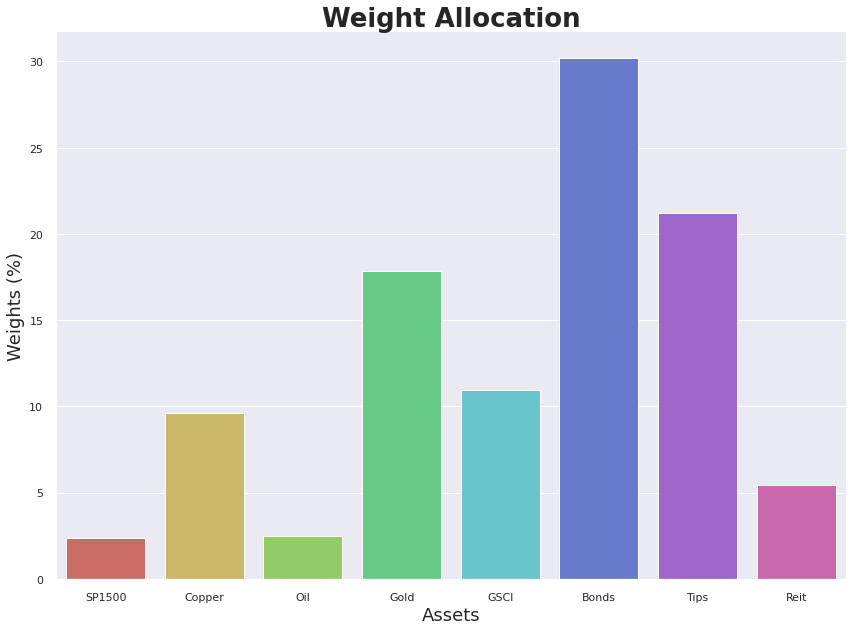

In [26]:
sns.set(rc={"figure.figsize":(300, 100)})

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style('darkgrid')

sns.catplot(data = weight_allo, kind = 'bar', height=8.27, aspect=11.7/8.27)

plt.title("Weight Allocation", fontsize = 26, weight = 'bold')
plt.xlabel('Assets', fontsize = 18, weight=90)
plt.ylabel('Weights (%)', fontsize = 18, weight=90)
plt.show()

In [27]:
final_returns = returns.drop(columns = 'Monthly Mean')
final_returns.head(2)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD)
Date,,,,,,,,
2012-11,0.005393,0.030331,0.034118,-0.002800,0.020405,0.001494,0.004569,-0.005363
2012-12,0.009458,-0.007610,0.033362,-0.021204,-0.004950,-0.001232,-0.005132,0.031802


In [28]:
final_returns["VolWt"] = final_returns.dot(weight_k) 
final_returns *= 100
final_returns.head(3)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),VolWt
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.674361
2012-12,0.945836,-0.761000,3.336160,-2.120430,-0.495040,-0.123241,-0.513191,3.180230,-0.374896
2013-01,5.152027,2.934410,6.054883,-0.756875,4.384769,-0.538879,-0.764927,3.461645,0.759212


In [29]:
tickers = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil', 'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index', \
           'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)']

for ticker in tickers:
    final_returns[ticker] = final_returns[ticker].cumsum()
final_returns.head(15)

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),VolWt
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.674361
2012-12,1.485129,2.272130,6.747958,-2.400468,1.545501,0.026127,-0.056252,2.643976,-0.374896
2013-01,6.637155,5.206540,12.802841,-3.157343,5.930270,-0.512752,-0.821179,6.105622,0.759212
2013-02,7.786806,0.878017,7.161495,-8.264467,1.859344,-0.042878,-0.559572,7.200706,-1.627003
2013-03,11.446622,-2.605602,12.726362,-7.137766,2.944443,0.060902,-0.251803,9.663808,0.437521
2013-04,13.148053,-8.969232,9.028414,-14.504270,-1.720923,0.916383,0.431786,16.097008,-1.734404
2013-05,15.334513,-5.015808,7.615635,-19.859300,-3.082953,-0.656571,-3.585844,9.823312,-2.374791
2013-06,13.940897,-12.708880,12.627634,-32.441645,-3.681869,-2.089183,-7.471591,7.714576,-4.328183
2013-07,18.947686,-10.484792,21.199162,-25.168603,0.738579,-1.954635,-7.045168,8.636929,2.503030


In [30]:
# Export DF
final_returns.to_csv("DF VolWt.csv")

In [31]:
final_returns['VolWt'] = final_returns['VolWt'].cumsum()
final_returns.head()

,S&P Composite 1500,S&P GSCI Copper,S&P GSCI Crude Oil,S&P GSCI Gold,S&P GSCI,S&P U.S. Aggregate Bond Index,S&P U.S. TIPS Index (USD),S&P United States REIT (USD),VolWt
Date,,,,,,,,,
2012-11,0.539293,3.033129,3.411798,-0.280038,2.040541,0.149368,0.456939,-0.536254,0.674361
2012-12,1.485129,2.272130,6.747958,-2.400468,1.545501,0.026127,-0.056252,2.643976,0.299465
2013-01,6.637155,5.206540,12.802841,-3.157343,5.930270,-0.512752,-0.821179,6.105622,1.058677
2013-02,7.786806,0.878017,7.161495,-8.264467,1.859344,-0.042878,-0.559572,7.200706,-0.568326
2013-03,11.446622,-2.605602,12.726362,-7.137766,2.944443,0.060902,-0.251803,9.663808,-0.130805


In [32]:
final_returns.index = pd.to_datetime(final_returns.index)
type(final_returns.index)

pandas.core.indexes.datetimes.DatetimeIndex

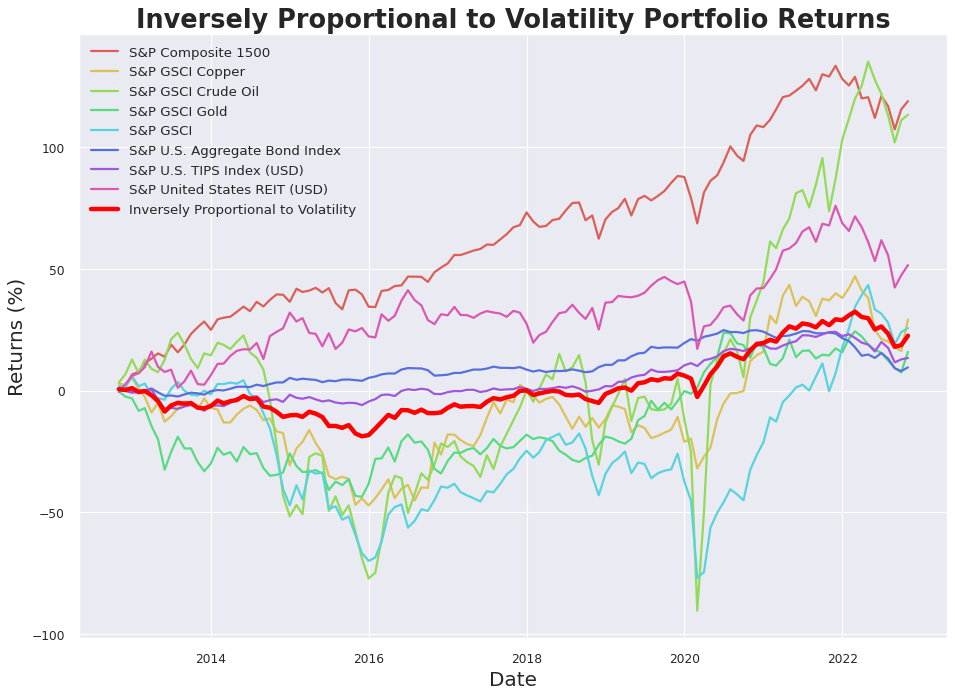

In [33]:
figure(figsize=(14, 10), dpi=80)

palette = sns.color_palette("hls", 8)
sns.set_palette(palette)
sns.set_style('darkgrid')

plt.plot(final_returns.index, final_returns['VolWt'], label = 'Inversely Proportional to Volatility', color = 'red', linewidth = 4)

vars = ['S&P Composite 1500','S&P GSCI Copper','S&P GSCI Crude Oil',
             'S&P GSCI Gold','S&P GSCI','S&P U.S. Aggregate Bond Index',
             'S&P U.S. TIPS Index (USD)','S&P United States REIT (USD)' ]
for i in vars:
    plt.plot(final_returns.index, final_returns[i], label = i, linewidth = 2)



date_form = DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(date_form)

plt.title("Inversely Proportional to Volatility Portfolio Returns", fontsize = 23, weight = 'bold')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Returns (%)', fontsize = 18)
plt.legend(fontsize = 12, loc = 'upper left')
plt.show()